
<body>
  <h2><font color="blue">Maximizing Conversions: A Comprehensive Study of Leads & Sales Performance</font></h2>
</body>

## Introduction

This notebook presents an analysis of lead conversion data collected from a travel booking company. The dataset includes various attributes related to leads, their sources, assigned agents, enquiry destinations, and the outcomes of these leads. By examining this data, we aim to uncover key insights and trends that can help in understanding the effectiveness of different lead sources, the performance of agents, and the preferences of clients.

![image](travel.jpeg)
---



### Dataset Overview

The dataset contains the following columns:

- **Lead Date:** The date when the lead was generated.
- **Lead Source:** The origin of the lead (e.g., website, referral, advertisement).
- **Name:** The name of the lead.
- **Phone:** The contact phone number of the lead.
- **Assigned To:** The agent assigned to handle the lead.
- **Enquiry Destination:** The travel destination the lead is interested in.
- **ExClient:** A flag indicating whether the lead is an existing client.
- **Status:** The current status of the lead (e.g., converted, not converted (Blank).
- **Conversion Date:** The date when the lead was converted (if applicable).
- **Trip:** Trip Name.
- **Trip Date:** The date of the booked trip (if applicable).
- **Booking ID:** The unique identifier for the booking (if applicable).
- **Pax:** The number of passengers for the booking.
- **Per Person Cost:** The cost per person for the trip.
- **Total Bill:** The total bill amount for the booking.
- **Converted By:** The agent who converted the lead.
- **Date:** The lead date (minus the timestamp). -- An Extracted Column
- **Month:** The month of lead date -- An Extracted Column
- **TripYear:** -- An Extracted Column
- **LeadYear:** -- An Extracted Column

---

### Objectives

Through this analysis, we aim to answer several key questions:

1. What are the overall trends in lead generation and conversion?
2. Which lead sources are most effective in generating conversions?
3. How do different enquiry destinations fare in terms of conversion rates?
4. What is the performance of individual agents in terms of conversion rates?
5. Are there any notable patterns or anomalies in the data?

By the end of this analysis, I hope to provide actionable insights and strategic recommendations to enhance lead conversion rates and overall business performance.


In [1]:
#Importing Essential Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.size'] = 16

In [2]:
#reading the CSV
PATH = r'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/refs/heads/main/sales_conversion/Data.csv'
df = pd.read_csv(PATH)
#removing the spaces in column names
df.columns = [i.replace(" ", "") for i in df.columns]
df['TripYear'] = pd.to_datetime(df['TripDate']).dt.year
df['LeadYear'] = pd.to_datetime(df['LeadDate']).dt.year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [3]:
df.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear,LeadYear
0,2023-07-16 5:34:00,Lead Source 1,jzjwPXoyff nrw,(&))^!%@!!,Sales Person 1,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
1,2023-07-16 5:39:00,Lead Source 2,mfz|Xn iwnnwY,*@!!@%*$##,Sales Person 2,Andaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
2,2023-07-16 5:39:00,Lead Source 1,wwmâMãmgxm Çä,*)((^#@)!#,Sales Person 0,Himachal Trips,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
3,2023-07-16 5:42:00,Lead Source 1,lZ sf XfmsfWwyn,(&$)##!@)%,Sales Person 3,Ladakh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023
4,2023-07-16 5:55:00,Lead Source 1,fXwnfwfsXpl,)*&%($$$##,Sales Person 0,Spiti Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul,NaN,2023


In [4]:
n_rows, n_cols = df.shape
print(f'The dataset has {n_rows:,} rows and {n_cols} columns.')

The dataset has 93,481 rows and 20 columns.


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Pax,3232.0,2.108911,1.0,1.0,2.0,2.0,21.0,1.652555
PerPersonCost,3232.0,2747.937191,0.0,1764.0,2240.0,3155.25,99760.0,2849.761607
TotalBill,3232.0,5778.488552,0.0,2142.0,4128.0,6741.0,139680.0,7114.953276
Date,93481,2023-09-04 14:51:13.522961664,2023-07-16 00:00:00,2023-08-13 00:00:00,2023-09-04 00:00:00,2023-09-28 00:00:00,2023-10-24 00:00:00,NaN
TripYear,3232.0,2023.160272,2023.0,2023.0,2023.0,2023.0,2024.0,0.366915
LeadYear,93481.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LeadDate            93481 non-null  object        
 1   LeadSource          93481 non-null  object        
 2   Name                93145 non-null  object        
 3   Phone               93481 non-null  object        
 4   AssignedTo          93481 non-null  object        
 5   EnquiryDestination  87424 non-null  object        
 6   ExClient            3420 non-null   object        
 7   Status              3232 non-null   object        
 8   ConversionDate      3232 non-null   object        
 9   Trip                3232 non-null   object        
 10  TripDate            3232 non-null   object        
 11  BookingID           3232 non-null   object        
 12  Pax                 3232 non-null   float64       
 13  PerPersonCost       3232 non-null   float64   

In [7]:
#setting up the sqlite3 database connection
conn = sqlite3.connect('data.db')
#Converting the data to SQLite3 DB file
df.to_sql('travels', conn, if_exists='replace', index=False)

93481

In [8]:
#Converting the date column datatypes
cols = list(df.columns[df.columns.str.contains('Date', regex=True)])
for col in cols:
  df[col] = pd.to_datetime(df[col])

In [9]:
#Replacing the DB file with the added column
df.to_sql('travels', conn, if_exists='replace', index=False)

93481

## EDA

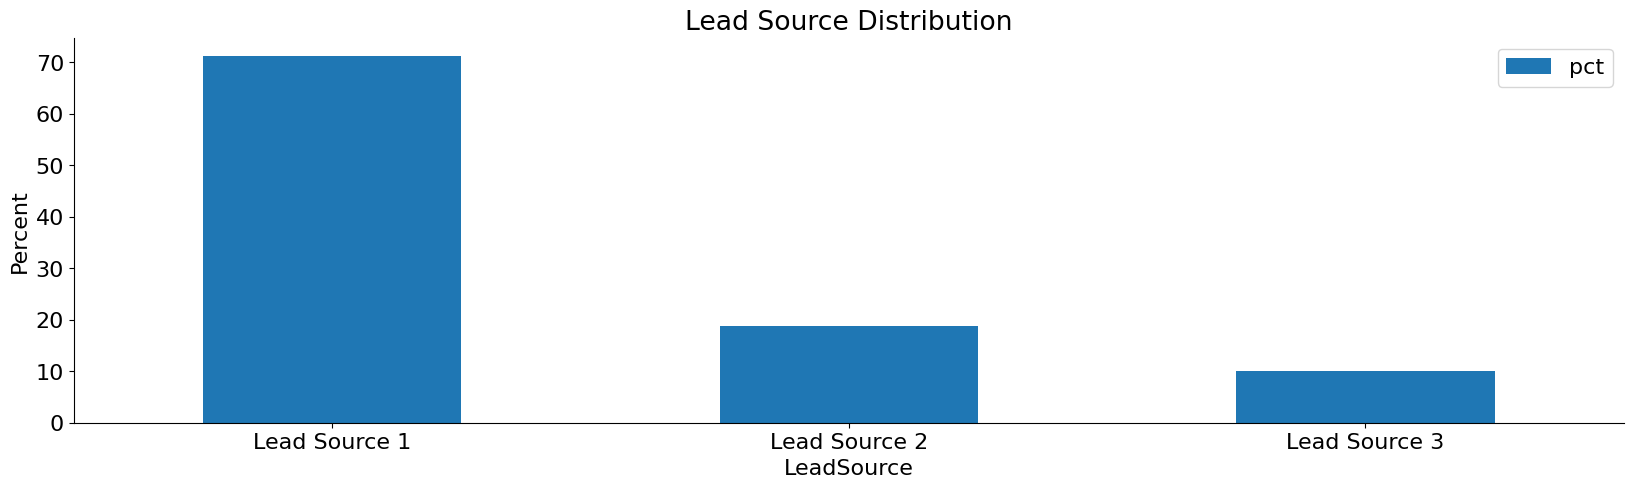

In [10]:
query = '''
select LeadSource,
      round(count(*)*100.0/(select count(*) from travels),2) as pct
from travels
group by LeadSource
order by pct desc
'''
lead_dist = pd.read_sql(query, conn)
lead_dist.set_index('LeadSource').plot(kind='bar',
                                  title='Lead Source Distribution')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

- **Observation** : Lead Source 1 Generates the maximum leads at 71.17% and Lead Source 3 sits at the bottom of the table generating only 10.06% of the total leads
- **So what?** : Lead Source 1 is doing pretty well and Lead Source is not doing well
- **Action** : Lead Source 3 needs to be checked and determined as to why the leads are less. Find out if this can be increased or not. If not, there shouldn't be any point worth spending on marketing on this Lead Source

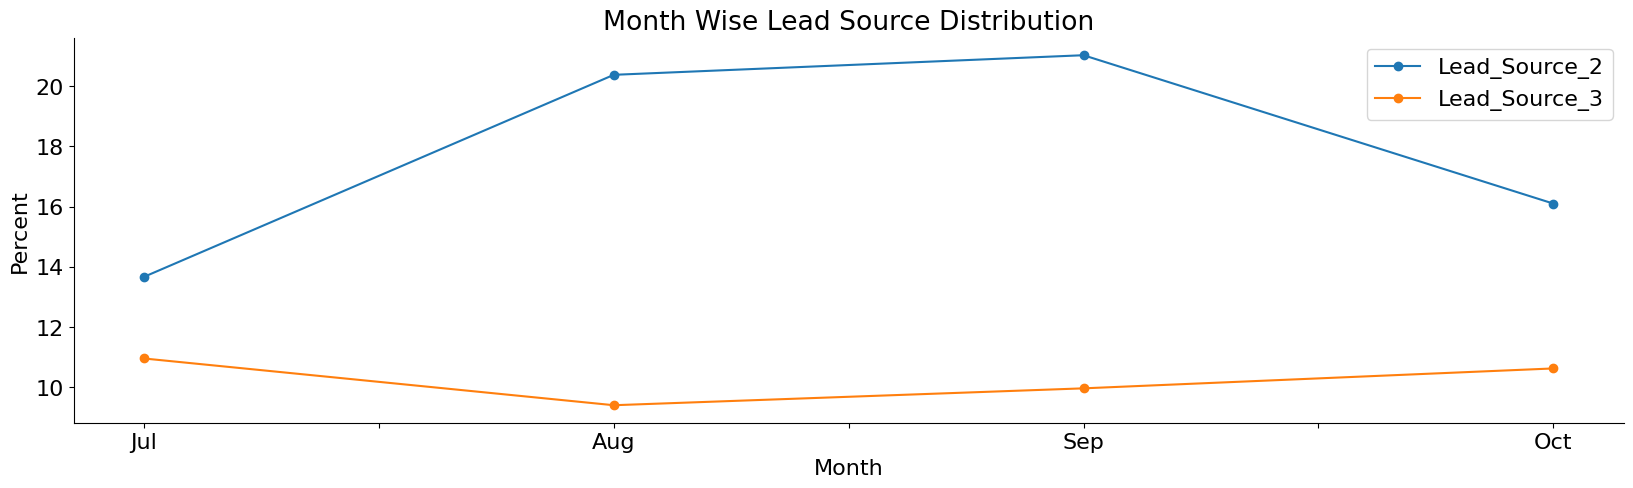

In [11]:
query = '''
select Month,
       round(sum(case when LeadSource='Lead Source 2' then 1 else 0 end)*100.0/count(*),2) as Lead_Source_2,
       round(sum(case when LeadSource='Lead Source 3' then 1 else 0 end)*100.0/count(*),2) as Lead_Source_3
from travels
group by 1
order by
case when Month='Jul' then 1
     when Month='Aug' then 2
     when Month='Sep' then 3
     when Month='Oct' then 4
     else 0 end
'''
lead_sources = pd.read_sql(query, conn)
lead_sources.set_index('Month').plot(kind='line',
                             title='Month Wise Lead Source Distribution',
                             marker='o')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

- **Observation** :
  - Lead Source 2 initially performed better and showed an upward trend from July to September but experienced a dip in October.
  - Lead Source 3, while initially weaker, demonstrated a gradual improvement from August to October with a minor dip in September.
- **So what?** :
  - Lead Source 2 remains a strong performer overall, but its October dip requires further investigation to understand potential causes and prevent future declines.
  - Lead Source 3's consistent improvement suggests it might be a more stable and promising source for long-term growth, despite the minor setback in September.
- **Action** :
  - Investigate the reasons for Lead Source 2's October dip, focusing on potential factors like seasonality, campaign performance, or market conditions or offers/schemes affect. Adjust strategies accordingly to maintain its strong performance.
  - Continue monitoring and supporting Lead Source 3's growth by analyzing the September dip and refining incentivization efforts to ensure consistent improvement. Evaluate lead quality and conversion rates to ensure its long-term potential.

In [12]:
query = '''
select LeadSource,
      round(count(*)*100.0/(select count(*) from travels),2) as leads_pct,
      round(count(ConvertedBy)*100.0/(select count(*) from travels),2) as conv_pct
from travels
group by LeadSource
'''
conversions = pd.read_sql(query, conn)
conversions

,LeadSource,leads_pct,conv_pct
0,Lead Source 1,71.17,2.09
1,Lead Source 2,18.77,0.48
2,Lead Source 3,10.06,0.88


- **Observation** :
 - Lead Source 1 generates the highest percentage of leads (71.17%) and has the highest conversion rate (2.09%).
 - Lead Source 2 generates a moderate percentage of leads (18.77%) but has a low conversion rate (0.48%).
  - Lead Source 3 generates the lowest percentage of leads (10.06%) but has a higher conversion rate (0.88%) compared to Lead Source 2.
- **So What?** :
  - Lead Source 1 is the most effective overall, generating both a high volume of leads and a good conversion rate.
  - Lead Source 2 is underperforming, generating leads but struggling to convert them.
  - Lead Source 3, despite generating fewer leads, shows potential for higher-quality leads with a better conversion rate than Lead Source 2.
- **Action** :
  - For Lead Source 2: Investigate why it has a low conversion rate despite generating leads. This could involve analyzing lead quality, agent performance, or the sales process. Consider retraining or adjusting strategies to improve conversion rates.
  - For Lead Source 3: Explore ways to increase the volume of leads generated by this source, as it shows promise for higher conversion rates. This might involve targeted marketing campaigns or partnerships.

## Agent's Performance

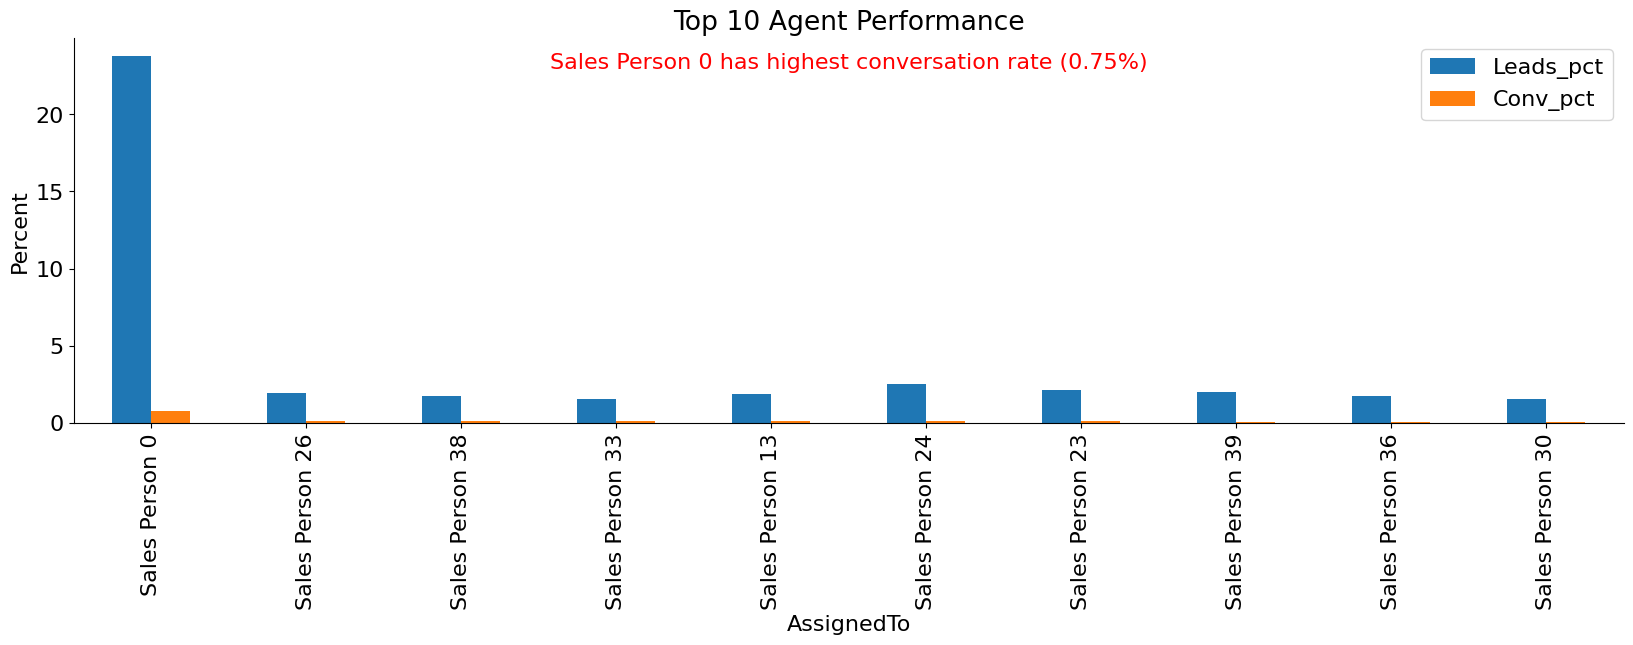

In [13]:
query = '''
select AssignedTo,
      round(count(*)*100.0/(select count(*) from travels),2) as Leads_pct,
      round(count(ConvertedBy)*100.0/(select count(AssignedTo) from travels),2) as Conv_pct
from travels
group by 1
order by 3 desc
'''
agent_df = pd.read_sql(query, conn)
agent_df.set_index('AssignedTo').head(10).plot(kind='bar',
                                  title='Top 10 Agent Performance')
plt.text(0.5, 0.92, "Sales Person 0 has highest conversation rate (0.75%)",
         color='red',
         ha='center',
         transform=plt.gca().transAxes)
plt.ylabel('Percent')
plt.show()

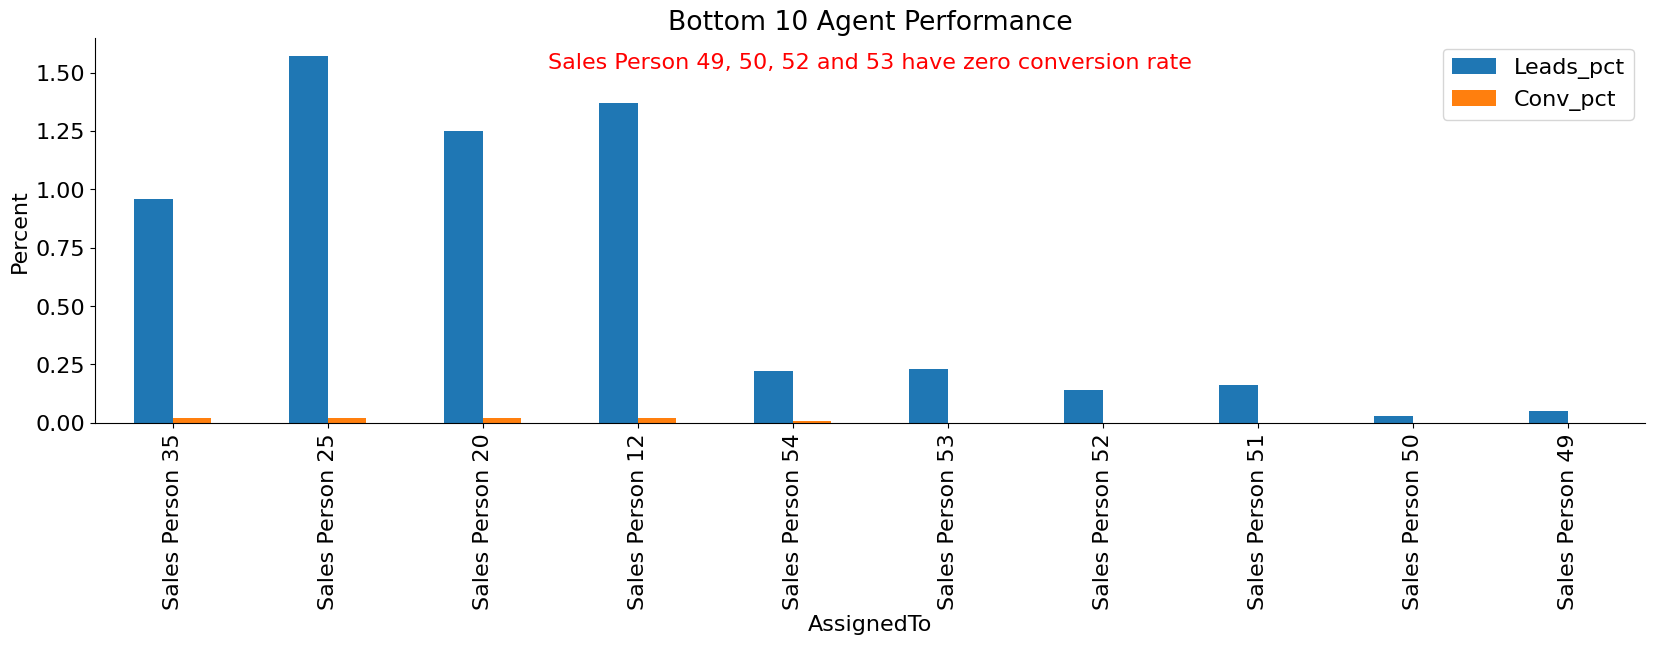

In [14]:
agent_df.set_index('AssignedTo').tail(10).plot(kind='bar',
                                  title='Bottom 10 Agent Performance')
plt.text(0.5, 0.92, "Sales Person 49, 50, 52 and 53 have zero conversion rate",
         color='red',
         ha='center',
         transform=plt.gca().transAxes)
plt.ylabel('Percent')
plt.show()

- **Observation**: Sales Person 0 has the highest conversion rate at 0.75% and highest lead percentage at 23.75%. Top 3 performers (Sales Person 0, 26, 38) drive significant sales revenue. Most salespeople have conversion rates < 0.11%.
- **So what?**: Sales Person 0 is the top performer. These salespeople consistently generate leads and conversions. There is still room for improvement in conversion rates.
- **Action**: Reward and recognize Sales Person 0's exceptional performance. Incentivize and develop these top performers. Provide training  to other agents to enhance conversion rates.

## Client's Preference

In [15]:
query = '''
select EnquiryDestination,
      count(*) as Count
from travels
where EnquiryDestination is not null
group by 1
order by 2 desc
limit 10
'''
enquiry_df = pd.read_sql(query, conn)
enquiry_df

,EnquiryDestination,Count
0,Meghalaya,7932
1,Bali,6806
2,Ladakh,6657
3,Spiti Valley,6190
4,Leh Ladakh,5698
5,Vietnam,5567
6,Thailand,4736
7,Kashmir,3821
8,Bhutan,3593
9,Upcoming Trips,2457


Observation:

1.	**Meghalaya, Bali, and Ladakh** have the highest enquiry counts, with Meghalaya leading at 7,932. This indicates significant interest in these locations, likely due to their unique appeal or popularity among travelers.
2.	The **top 10 destinations include a mix** of domestic (Meghalaya, Spiti Valley, Kashmir) and international locations (Bali, Vietnam, Bhutan), suggesting diverse traveler interests within this customer base.

So What?

- High enquiry counts for specific destinations reveal **customer preferences and potential areas** to focus marketing and service enhancements. Understanding why these destinations are popular could further guide campaign strategies.
- International destinations like Bali and Vietnam rank high in enquiries, indicating an **opportunity to target customers interested in overseas travel**. Similarly, domestic destinations with high interest, like Meghalaya and Ladakh, might benefit from tailored travel packages.

What to Do:

1.	Invest in **targeted marketing efforts for the top destinations** to leverage their existing popularity. This could include social media campaigns, special offers, or content that highlights the unique aspects of these places.
2.	For destinations like Bali and Vietnam, consider additional services like customized travel packages, itineraries, or partnerships with local businesses to enhance the customer experience and potentially increase conversion.
3.	Perform further analysis to understand what factors (e.g., seasonal trends, travel blogs, or social media influence) might be driving high enquiries for these destinations. This insight can inform ongoing strategy and help anticipate emerging popular destinations.

In [16]:
query = '''
select EnquiryDestination,
      count(*) as Count,
      count(ConvertedBy) as Conversion,
      round(count(ConvertedBy)*100.0/count(*),2) as Conversion_Pct
from travels
where EnquiryDestination is not null
group by 1
having count(*) >= 10
order by 4 desc
limit 10
'''
conv_df = pd.read_sql(query, conn)
conv_df

,EnquiryDestination,Count,Conversion,Conversion_Pct
0,Spiti,23,5,21.74
1,Early Bird Offer,53,9,16.98
2,Bir Kasol,19,3,15.79
3,Manali-Jispa,14,2,14.29
4,Ladakh - Srinagar to Manali,14,2,14.29
5,Bir Billing,46,6,13.04
6,Weekend Trips,804,95,11.82
7,Kasol Kheerganga,70,8,11.43
8,Tirthan Valley,59,6,10.17
9,Spiti Summer,10,1,10.00


**Observation:**
  1. Although Spiti doesn’t have the highest enquiry count, it has the highest conversion percentage (21.74%), suggesting that customers are likely more decisive about this destination.
  2. The “Early Bird Offer” ranks high in conversion percentage (16.98%), indicating that clients are motivated by time-sensitive deals.
  3. While “Weekend Trips” has a high enquiry count, its conversion rate is relatively lower (11.82%), possibly suggesting a mismatch between client expectations, availability, or budget for these shorter trips.

**So what?**
  - Destination Preference: High conversion for Spiti suggests that customers may already be interested in specific destinations, and additional promotion may not be as necessary for Spiti as for other locations.
  - Appeal of Promotional Offers: The success of “Early Bird Offers” implies that time-limited promotions can drive higher conversions, suggesting a strategy to leverage such offers for other destinations.
  - Adjustments Needed for Weekend Trips: The lower conversion rate for weekend trips may indicate they don’t align well with customer needs, potentially due to budget constraints or timing.

**What to Do:**

1.	Focus on Retaining Interest for High-Conversion Destinations: For destinations like Spiti, maintain the current appeal by highlighting unique experiences and sharing testimonials, ensuring customers continue to see value.
2.	Leverage Time-Sensitive Offers: Expand the use of time-limited promotions, like “Early Bird Offers,” for other popular destinations to capitalize on customer motivation.
3.	Reevaluate Weekend Trip Offerings: Explore ways to align weekend trips more closely with customer expectations, possibly by offering more affordable options or flexible packages that could improve conversion rates.


In [17]:
query = '''
WITH DestinationsData AS (
    SELECT
        EnquiryDestination,
        COUNT(*) AS EnquiryCount,
        COUNT(ConvertedBy) AS ConversionCount,
        ROUND(COUNT(ConvertedBy) * 100.0 / COUNT(*), 2) AS ConversionRate
    FROM travels
    WHERE EnquiryDestination IS NOT NULL
    GROUP BY EnquiryDestination),

HighEnquiryLowConversion AS (
    SELECT
        EnquiryDestination,
        EnquiryCount,
        ConversionCount,
        ConversionRate
    FROM DestinationsData
    WHERE EnquiryCount > (SELECT AVG(EnquiryCount) FROM DestinationsData) -- Filter for high enquiries
        AND ConversionRate < (SELECT AVG(ConversionRate) FROM DestinationsData)) -- Filter for low conversion rate

SELECT *
FROM HighEnquiryLowConversion
ORDER BY EnquiryCount DESC
LIMIT 10;
'''
temp = pd.read_sql(query, conn)
temp

,EnquiryDestination,EnquiryCount,ConversionCount,ConversionRate
0,Meghalaya,7932,182,2.29
1,Bali,6806,111,1.63
2,Leh Ladakh,5698,111,1.95
3,Vietnam,5567,74,1.33
4,Thailand,4736,34,0.72
5,Kashmir,3821,77,2.02
6,Bhutan,3593,71,1.98
7,Upcoming Trips,2457,32,1.30
8,Bali BYOG,2063,33,1.60
9,Unknown,1871,46,2.46


**Observations:**
  - High Inquiry Volume: Meghalaya has the highest inquiry count (7932), followed by Bali (6806) and Leh Ladakh (5698).
  - Conversion Rates: The conversion rates vary, with Unknown destinations having the highest rate at 2.46%, and Thailand having the lowest at 0.72%.
  - Low Overall Conversion: There are significant inquiry counts, but conversion rates are generally low across most destinations.

**So what?**
  - The high inquiry counts suggest strong interest in these destinations, indicating potential for higher conversions if targeted marketing strategies are implemented.
  - The Unknown category’s high conversion rate might indicate effective strategies or customer targeting that could be explored and replicated for other destinations.
  - Low conversion rates, especially for Thailand, highlight the need to analyze the reasons behind low conversion. This could be due to pricing, competition, or lack of tailored marketing strategies.

**Action**

- Design campaigns for high-interest destinations (e.g., Meghalaya and Bali) to improve conversion rates. Utilize customer feedback and market research to tailor offerings to their preferences.
- Investigate what factors contribute to the high conversion rate in the Unknown category to apply similar strategies to other destinations.
- For destinations with low conversion rates (like Thailand), conduct a deep dive into customer feedback, competitive analysis, and pricing strategies to determine necessary adjustments.
- Continue to track inquiry and conversion rates over time to gauge the effectiveness of implemented strategies and adapt as necessary.



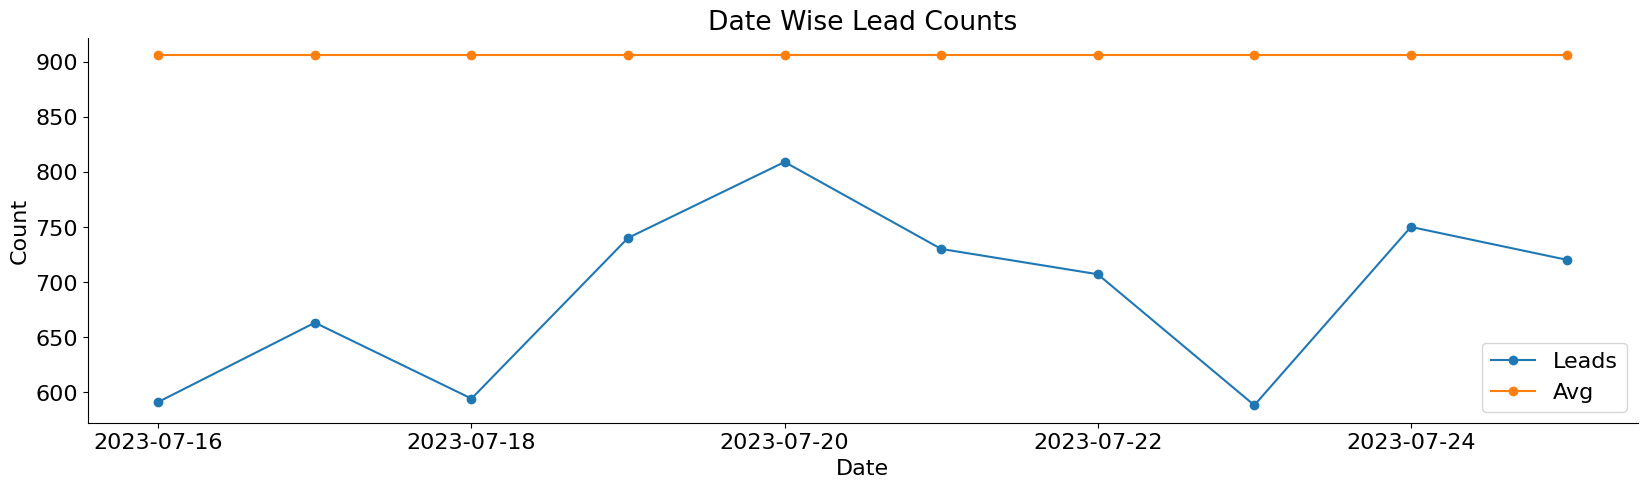

In [36]:
query = '''
select strftime("%Y-%m-%d",Date) as Date, 
        count(Date) as Leads
from travels
group by 1
order by 1 asc
'''
temp = pd.read_sql(query, conn)
q1, q3 = temp['Leads'].quantile(0.25), temp['Leads'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
temp['Avg'] = int(temp.query('Leads > @lower_bound and Leads < @upper_bound')['Leads'].mean())
temp.set_index('Date').head(10).plot(marker='o',
                                  title='Date Wise Lead Counts')
plt.ylabel('Count')
plt.show()

**Observations:**

* **Trend:** The lead count over days have a fluctuating pattern.
* **Average:** The orange line indicates a constant average lead count of around 900.
* **Lead Counts:** The lead counts fluctuate between 600 and 800.

**So What?:**

1. **Lead Fluctuations:** The fluctuating pattern suggests that there are factors influencing lead generation that are not consistent. This could be due to external factors like market trends, competitor activity, or internal factors such as marketing campaign effectiveness or sales team performance.
2. **Below Average Leads:** The lead count consistently dips below the average, indicating a potential issue in lead generation or conversion. This could be due to various reasons, such as low-quality leads, ineffective lead nurturing, or issues in the sales process.

**Action Points:**

1. **Identify Root Causes:** Use data analytics tools to investigate the reasons behind the fluctuations. Look at factors like marketing channel performance, website traffic, and sales team activity.
2. **Optimize Lead Generation:** Improve lead generation strategies by targeting high-quality leads and refining marketing messages. Consider A/B testing different approaches to identify what works best.
3. **Enhance Lead Nurturing:** Implement a robust lead nurturing process to improve lead quality and conversion rates. This could involve personalized email campaigns, targeted content offers, and timely follow-ups.
4. **Monitor and Adjust:** Continuously monitor lead generation and conversion metrics to identify trends and make necessary adjustments. Regular analysis will help ensure that the lead generation process remains effective.

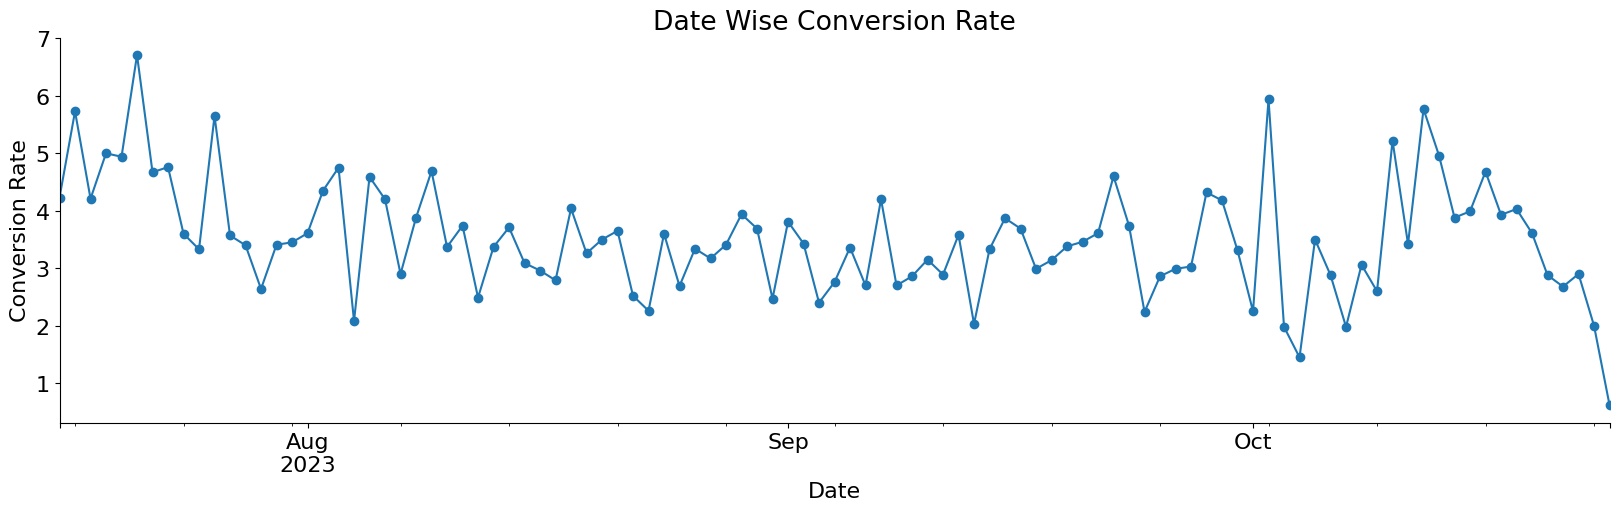

In [51]:
query = '''
select strftime("%Y-%m-%d",Date) as Date, count(Date) as Leads, count(ConvertedBy) as Conversion
from travels
group by 1
order by 1 asc
'''
temp1 = pd.read_sql(query, conn)
temp1['Date'] = pd.to_datetime(temp1['Date'])
temp1['Conv_Rate'] = round(temp1['Conversion']/temp1['Leads']*100,2)
temp1.set_index('Date')['Conv_Rate'].plot(marker='o',
                                  title='Date Wise Conversion Rate')
plt.ylabel('Conversion Rate')
plt.show()

In [66]:
!pip3 install pymannkendall --quiet

In [70]:
# Mann-Kendall Test
def mann_kendall_test(x):
  import pymannkendall as mk
  results = mk.original_test(x)
  return results.trend, results.z, results.p

# Apply the test to the conversion rate data
trend , z_stat, p_value = mann_kendall_test(temp1['Leads'])

print("Mann-Kendall Test Results:")
print("Trend:", trend)
print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant trend in the data.")
else:
    print("There is no statistically significant trend in the data.")

Mann-Kendall Test Results:
Trend: no trend
Z-statistic: 0.4343
p-value: 0.6641
There is no statistically significant trend in the data.


## Key Insights and Conclusions

**Lead Generation:**

* Lead Source 2 is currently the top performer, but its recent dip warrants further investigation.
* Lead Source 3 shows promising growth potential and should be prioritized.
* Overall lead generation is fluctuating, indicating a need for consistent optimization.

**Conversion Rates:**

* Lead Source 1 has the highest conversion rate, but Lead Source 3 also shows promise.
* Lead Source 2's low conversion rate requires immediate attention and analysis.
* Sales Person 0 is a top performer and should be recognized and incentivized.

**Destination Preferences:**

* Meghalaya, Bali, and Ladakh are the most popular destinations.
* Spiti has the highest conversion rate, suggesting strong customer interest.
* Weekend trips have lower conversion rates, indicating a potential mismatch with customer needs.

**Overall:**

* There is potential for significant improvement in lead generation and conversion rates.
* Data-driven analysis and strategic adjustments are crucial to optimize performance.
* Focusing on top-performing sources, understanding customer preferences, and refining marketing and sales strategies will drive growth.

**Recommendations:**

1. **Deep Dive into Lead Source 2's Dip:** Analyze factors like campaign performance, market conditions, and internal processes to identify the root cause.
2. **Prioritize Lead Source 3:** Invest in targeted marketing and lead nurturing to further boost its performance.
3. **Optimize Lead Generation:** Continuously experiment with different strategies to increase lead volume and quality.
4. **Improve Conversion Rates:** Focus on lead quality, sales training, and personalized customer experiences.
5. **Leverage Top-Performing Destinations:** Utilize insights from high-performing destinations to attract more customers.
6. **Refine Weekend Trip Offerings:** Adjust pricing, duration, or inclusions to better align with customer preferences.
7. **Data-Driven Decision Making:** Continuously monitor key metrics and use data analytics to identify trends and make informed decisions.

By implementing these recommendations and staying agile, you can significantly enhance your lead generation and conversion performance.
